In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator

from Logical import LogicalCircuit
from NoiseModel import construct_noise_model_QuantinuumH1_1

# clearing lib cache during development to force-update imports
import sys, importlib
importlib.reload(sys.modules['Logical'])
importlib.reload(sys.modules['NoiseModel'])

<module 'NoiseModel' from '/home/rasmitdevkota/projects/QCA/gatech-qec-project/src/NoiseModel.py'>

In [2]:
# We use the Steane code to demonstrate the library
stabilizer_tableau = [
  "XXXXIII",
  "IXXIXXI",
  "IIXXIXX",
  "ZZZZIII",
  "IZZIZZI",
  "IIZZIZZ",
]

noise_model = construct_noise_model_QuantinuumH1_1(n_qubits=10)

In [3]:
# Runs a shot on a noiseless simulator with an error at each of the physical qubits
shots = 1
simulator = AerSimulator()

outputs = []
for i in range(7):
    # Generates the circuit
    lqcirc = LogicalCircuit(2, [7,1,3], stabilizer_tableau, name="SteaneCodeCircuit")
    lqcirc.encode(0,1, max_iterations=1, initial_states=[0,1])

    # Inserts an error on both logical qubits
    lqcirc.add_error(0, i, 'X') # Can test X or Z errors
    lqcirc.add_error(1, i, 'X')

    # Adds QEC cycle and measurement
    lqcirc.perform_qec_cycle([0, 1])
    lqcirc.measure([0, 1], [0, 1])

    # Simulates the QEC cycle
    qc = transpile(lqcirc, backend=simulator)
    result = simulator.run(qc, shots=shots, memory=True).result()
    output = result.get_memory(lqcirc)
    outputs.append(output[0][:2])

# Outputs should all be 10 if the error correction worked properly
print(outputs)

ValueError: At least one of the following quantum arguments to operation 'reset' are unrecognized: [QuantumRegister(7, 'qlog0')]

ValueError: At least one of the following quantum arguments to operation 'reset' are unrecognized: [QuantumRegister(7, 'qlog0')]

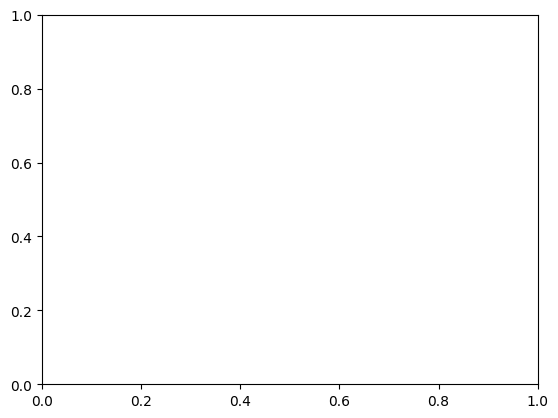

In [4]:
from qiskit.visualization import plot_histogram

# Tests encoding verification. Accuracy (historically) should be about 99.3%
max_max_it = 5
shots = int(1E6)

simulator = AerSimulator()
noise_model = construct_noise_model_QuantinuumH1_1(n_qubits=lqcirc.num_qubits-2)

fig, ax = plt.subplots()
plot_option = "probs"
width = 0.3

outcomes = range(1, max_max_it+1)
all_data = []

for max_it in range(1, max_max_it+1):
    lqcirc = LogicalCircuit(1, (7,1,3), stabilizer_tableau, "test_circuit")
    lqcirc.encode(0, max_iterations=max_it)
    lqcirc.x(0)
    
    lqcirc_transpiled = transpile(lqcirc, backend=simulator)
    result = simulator.run(lqcirc_transpiled, shots=shots, memory=True, noise_model=noise_model).result()
    output = result.get_memory(lqcirc_transpiled)
    
    zeros = 0
    ones = 0
    
    for o in output:
        if o[-1] == '0':
            zeros += 1
        if o[-1] == '1':
            ones += 1

    counts = [zeros, ones]

    if plot_option == "counts":
        data = counts
    elif plot_option == "probs":
        data = [count/shots for count in counts]
    else:
        raise ValueError(f"'{plot_option}' is not a valid plot_option; choose from ['counts', 'probs']")

    # @TODO - this doesn't render correctly (actually, it doesn't render at all) with logit scale
    bar = ax.bar(max_it, data[0], width, log=True, label=f"max_iterations={max_it}")
    ax.bar_label(bar)

ax.set_xticks(outcomes)

ax.set_yscale("log")

ax.set_title("Encoding verification test")
ax.set_xlabel("Max number of iterations")
ax.set_ylabel("N(0)" if plot_option == "counts" else "P(0)")

ax.legend()

plt.show()

In [5]:
lqcirc = LogicalCircuit(1, (7,1,3), stabilizer_tableau)
lqcirc.encode(0)
lqcirc.perform_qec_cycle([0])
# lqcirc.draw('mpl')

ValueError: At least one of the following quantum arguments to operation 'reset' are unrecognized: [QuantumRegister(7, 'qlog0')]

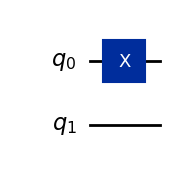

In [6]:
# We can also construct a logical circuit from a physical qubit circuit, first by constructing a QuantumCircuit:
pqc = QuantumCircuit(2)
pqc.x(0)
# pqc.h(0)
# pqc.cx(0,1)
pqc.draw(output="mpl")

In [7]:
# Then, we convert the QuantumCircuit to a LogicalCircuit:
lqc = LogicalCircuit.from_physical_circuit(pqc, (7,1,3), stabilizer_tableau)
lqc.draw(output="mpl")

ValueError: At least one of the following quantum arguments to operation 'reset' are unrecognized: [QuantumRegister(7, 'qlog0')]